In [4]:
import pandas as pd
from pysentimiento import create_analyzer

In [5]:
modelo_analise_sentimento = create_analyzer(task='sentiment', lang='pt')

In [6]:
dados = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/hugging_face/refs/heads/main/Dados/resenhas.csv")

In [7]:
dados.head()

,ID,Resenha
0,24,"A fritadeira é sensacional, muito além do que ..."
1,733,"Após usar o produto, achei-o fácil e muito efi..."
2,865,"Muito funcional, prática e moderna."
3,809,"Boa, mas não das melhores pois a frente de vid..."
4,628,Eu comecei a usar e é bem espaçosa. Gostei poi...


In [11]:
resultados_previsao = modelo_analise_sentimento.predict(dados['Resenha'])
resultados_previsao

Map:   0%|          | 0/36 [00:00<?, ? examples/s]

[AnalyzerOutput(output=POS, probas={POS: 0.989, NEU: 0.009, NEG: 0.002}),
 AnalyzerOutput(output=POS, probas={POS: 0.670, NEU: 0.320, NEG: 0.011}),
 AnalyzerOutput(output=POS, probas={POS: 0.900, NEU: 0.097, NEG: 0.003}),
 AnalyzerOutput(output=NEG, probas={NEG: 0.731, NEU: 0.259, POS: 0.010}),
 AnalyzerOutput(output=POS, probas={POS: 0.976, NEU: 0.021, NEG: 0.003}),
 AnalyzerOutput(output=POS, probas={POS: 0.956, NEU: 0.037, NEG: 0.007}),
 AnalyzerOutput(output=POS, probas={POS: 0.838, NEU: 0.093, NEG: 0.069}),
 AnalyzerOutput(output=POS, probas={POS: 0.990, NEU: 0.008, NEG: 0.002}),
 AnalyzerOutput(output=POS, probas={POS: 0.961, NEU: 0.036, NEG: 0.003}),
 AnalyzerOutput(output=POS, probas={POS: 0.990, NEU: 0.007, NEG: 0.003}),
 AnalyzerOutput(output=NEG, probas={NEG: 0.896, NEU: 0.100, POS: 0.004}),
 AnalyzerOutput(output=NEG, probas={NEG: 0.990, NEU: 0.008, POS: 0.003}),
 AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.011, POS: 0.003}),
 AnalyzerOutput(output=NEU, probas={NE

In [12]:
sentimento = []

for resultado in resultados_previsao:
    sentimento.append(resultado.output)

In [13]:
sentimento

['POS',
 'POS',
 'POS',
 'NEG',
 'POS',
 'POS',
 'POS',
 'POS',
 'POS',
 'POS',
 'NEG',
 'NEG',
 'NEG',
 'NEU',
 'NEG',
 'NEG',
 'NEG',
 'NEU',
 'NEG',
 'NEG',
 'NEU',
 'NEG',
 'NEG',
 'NEG',
 'NEG',
 'NEG',
 'NEG',
 'NEG',
 'NEG',
 'NEG',
 'NEG',
 'POS',
 'POS',
 'NEU',
 'POS',
 'POS']

In [14]:
dados['Sentimento'] = sentimento

In [15]:
dados

,ID,Resenha,Sentimento
0,24,"A fritadeira é sensacional, muito além do que ...",POS
1,733,"Após usar o produto, achei-o fácil e muito efi...",POS
2,865,"Muito funcional, prática e moderna.",POS
3,809,"Boa, mas não das melhores pois a frente de vid...",NEG
4,628,Eu comecei a usar e é bem espaçosa. Gostei poi...,POS
5,657,"Usei ela algumas vezes já, muito silenciosa, l...",POS
6,182,"Superou minhas expectativas, por enquanto tudo...",POS
7,815,"Chegou no prazo. Amei, é muito linda. Não vejo...",POS
8,343,"Estou muito satisfeito com a negociação, receb...",POS
9,624,Lindaaaa amei super indico,POS


## Criando uma resenha mais visual

In [16]:
import plotly.express as px

df_sentimento = dados.groupby('Sentimento').size().reset_index(name='Contagem')

fig = px.bar(
    df_sentimento,
    x='Sentimento',
    y='Contagem',
    title='Contagem de sentimentos'
)

fig.show()

In [17]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
portuguese_stopwords = stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to /home/vicrrs/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
portuguese_stopwords

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

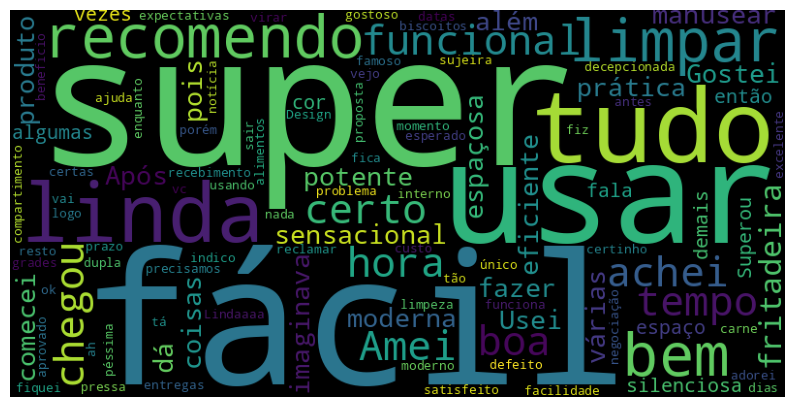

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def nuvem_palavras(texto, coluna_texto, sentimento):
    texto_sentimento = texto.query(f'Sentimento == "{sentimento}"')
    todas_palavras = ' '.join(palavra for palavra in texto_sentimento[coluna_texto])

    nuvem_palavras = WordCloud(
        stopwords=portuguese_stopwords,
        background_color='black',
        width=800,
        height=400
    ).generate(todas_palavras)

    plt.figure(figsize=(10, 8), facecolor=None)
    plt.imshow(nuvem_palavras)
    plt.axis('off')
    plt.show()

nuvem_palavras(dados, 'Resenha', 'POS')